---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [31]:
def answer_one():
    import pandas as pd
    import numpy as np
    
    #1st 17 rows are Nan so skiprows = 17 and last 38 rows are Nan or unwanted data sp skip_footer = 38
    energy = pd.read_excel('Energy Indicators.xls', skiprows = 17, skip_footer = 38)

    # the first 2 columns are un-neccessary so axis = 1 indicating column drop
    # and change columns name for readability
    energy.drop(labels=['Unnamed: 0', 'Unnamed: 1'], axis = 1,inplace= True)
    cols =['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    energy.columns = cols
    
    # Energy Supply and Energy Supply per Capita are dependent so changing '...' is required for both
    # It's required to change unit to gigajoules so calculations are requiring to change pd to numeric values
    energy['Energy Supply'] = energy['Energy Supply']* 1000000
    energy.dropna()
    
    # removing Digits and () from country names Using Regular Expressions
    # you want to extract: ( zero or more occurence of characters )
    # \ : signals to a special sequence
    # . :Any character (except newline character)
    # * : zero or more occurence
    energy['Country'] = energy['Country'].str.replace(r'\(.*\)', '')
    # \d+ Match one or more digits
    energy['Country'] = energy['Country'].str.replace('\d+', '')
    energy['Country'] = energy['Country'].str.strip()
    # So Iran's energy values back by deleting the spaces left from removal of parenthesis
    change_units = ['Energy Supply', 'Energy Supply per Capita', '% Renewable']
    energy[change_units] = energy[change_units].replace('...',np.nan)
    

    # Renaming countries
    energy['Country'] = energy['Country'].replace(
    {'China, Hong Kong Special Administrative Region':'Hong Kong',
    'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
    'Republic of Korea':'South Korea',
    'United States of America':'United States',})
    
    # print(energy)
    
    # Load the GDP data from file world_bank.csv
    GDP = pd.read_csv('world_bank.csv',skiprows = 3)
    # changing columns names to 1st row's names
    GDP.rename(columns = GDP.iloc[0], inplace = True)
    GDP.drop([0], axis = 0, inplace = True)   
    # Changing Country Names
    GDP['Country Name'] = GDP['Country Name'].replace(
    {'Korea, Rep.':'South Korea',
    'Iran, Islamic Rep.':'Iran',
    'Hong Kong SAR, China':'Hong Kong'})
    
    # Cleaning Data to perform actions
    
    GDP.rename(columns = {"Country Name": "Country"}, inplace = True)
    # Required Columns from 2006 - 2015 so remove 1st 50 columns
    GDP.drop(GDP.iloc[:,1:50],axis = 1, inplace = True)
    # Remove .0 from all columns
    GDP.columns = GDP.columns.astype(str).str.split('.').str[0] 
    #print(GDP)
    
    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    #print(ScimEn)
    # Join 3 datasets :ScimEn 191 * 8 , GDP 264 * 11 , energy 227 * 4 
    Newdf = pd.merge(ScimEn,energy,how='outer',left_on='Country',right_on='Country')
    Newdf2 = pd.merge(Newdf,GDP,how='outer',left_on='Country',right_on='Country')
    Newdf2 = Newdf2[:15].set_index('Country')

    return Newdf2
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1.0,127050.0,126767.0,597237.0,411683.0,4.70,138.0,127191000000,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2.0,96661.0,94747.0,792274.0,265436.0,8.20,230.0,90838000000,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3.0,30504.0,30287.0,223024.0,61554.0,7.31,134.0,18984000000,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4.0,20944.0,20357.0,206091.0,37874.0,9.84,139.0,7920000000,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5.0,18534.0,18301.0,34266.0,12422.0,1.85,57.0,30709000000,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6.0,17899.0,17620.0,215003.0,40930.0,12.01,149.0,10431000000,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7.0,17027.0,16831.0,140566.0,27426.0,8.26,126.0,13261000000,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8.0,15005.0,14841.0,128763.0,37209.0,8.58,115.0,33195000000,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9.0,13153.0,12973.0,130632.0,28601.0,9.93,114.0,10597000000,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [2]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [32]:
def answer_two():
    
    import pandas as pd
    import numpy as np
    # From Answer_one()
    # For Energy
    energy = pd.read_excel('Energy Indicators.xls', skiprows = 17, skip_footer = 38)
    energy.drop(labels=['Unnamed: 0', 'Unnamed: 1'], axis = 1,inplace= True)
    cols =['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    energy.columns = cols
    energy.dropna()
    
    energy['Country'] = energy['Country'].str.replace(r'\(.*\)', '')
    energy['Country'] = energy['Country'].str.replace('\d+', '')
    energy['Country'] = energy['Country'].str.strip() 
    # This brings the Iran energy values back!
    energy[cols] = energy[cols].replace('...',np.nan)
    
    energy['Country'] = energy['Country'].replace(
    {'China, Hong Kong Special Administrative Region':'Hong Kong',
    'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
    'Republic of Korea':'South Korea',
    'United States of America':'United States',})

    
    # For GDP
    GDP = pd.read_csv('world_bank.csv',skiprows = 3)
    GDP.rename(columns = GDP.iloc[0], inplace = True)
    GDP.drop([0], axis = 0, inplace = True)   
    GDP['Country Name'] = GDP['Country Name'].replace(
    {'Korea, Rep.':'South Korea',
    'Iran, Islamic Rep.':'Iran',
    'Hong Kong SAR, China':'Hong Kong'})
    GDP.rename(columns = {"Country Name": "Country"}, inplace = True)
    GDP.drop(GDP.iloc[:,1:50],axis = 1, inplace = True)
    GDP.columns = GDP.columns.astype(str).str.split('.').str[0] 
    
    # For ScimEn:
    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    
    # LOST ENTRIES = LEN(OUTER JOIN) - LEN(INNER JOIN)
    value_outer = len(pd.concat([ScimEn['Country'],energy['Country'],GDP['Country']]).unique()) 
    value_inter = (GDP.merge(energy, left_on='Country', right_on='Country', how='inner').merge(ScimEn, left_on='Country', right_on='Country', how='inner').shape[0])
    return value_outer - value_inter
answer_two()

156

## Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [33]:
def answer_three():
    import pandas as pd
    
    Top15 = answer_one()
    # Only include the last 10 years for columns
    Top15 = Top15.iloc[:,10:]
    avgGDP = Top15.mean(axis=1, skipna = True).sort_values(ascending=False)
    return avgGDP
answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [5]:
def answer_four():
    import pandas as pd
    Top15 = answer_one()
    sixth_country = answer_three().index[5]
    sigma = Top15.loc[sixth_country ,'2015'] - Top15.loc[sixth_country ,'2006']
    return sigma
answer_four()

246702696075.3999

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [34]:
def answer_five():
    Top15 = answer_one()
    Mean = Top15.iloc[:,8].mean()
    return Mean
answer_five()

157.59999999999999

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [7]:
def answer_six():
    import pandas as pd
    Top15 = answer_one()
    Max = (Top15['% Renewable'].idxmax() ,Top15['% Renewable'].max())
    return Max
answer_six()

('Brazil', 69.648030000000006)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [8]:
def answer_seven():
    Top15 = answer_one()
    Top15['Citation ratio'] = Top15['Self-citations'] / Top15['Citations']
    MaxCitationRatio = (Top15['Citation ratio'].idxmax(), Top15['Citation ratio'].max())
    return MaxCitationRatio
answer_seven()

('China', 0.68931261793894216)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [9]:
def answer_eight():
    Top15 = answer_one()
    Top15['PopEstimate'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    answer_eight = Top15['PopEstimate'].sort_values(ascending=False)
    answer_eight = answer_eight.index.tolist()[2]
    return answer_eight
answer_eight()

'United States'

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [35]:
def answer_nine():
    Top15 = answer_one()
    Top15['Population Estimate'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable Documents per Capita'] = Top15['Citable documents'] / Top15['Population Estimate']
    
   
    Top15['Citable Documents per Capita'] = Top15['Citable Documents per Capita'].astype(float)
    Top15['Energy Supply per Capita'] = Top15['Energy Supply per Capita'].astype(float)
    # Converted to float

    return Top15['Citable Documents per Capita'].corr(Top15['Energy Supply per Capita'])
answer_nine()

0.79400104354429457

In [11]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

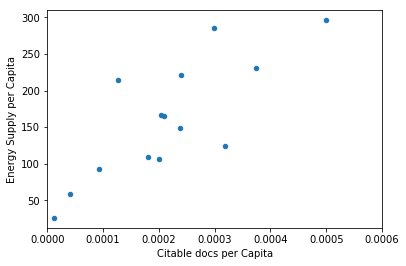

In [12]:
#plot9() # Be sure to comment out plot9() before submitting the assignment!

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [13]:
def answer_ten():
    import numpy as np
    Top15 = answer_one()
    # Using pandas.where won't help as it Replace values where the condition is False.
    # Using numpy.where Return elements chosen  depending on condition.
    Top15['HighRenew'] = np.where(Top15['% Renewable'] >= np.median(Top15['% Renewable']),1,0)
    return Top15
answer_ten()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,HighRenew
Country,,,,,,,,,,,,,,,,,,,,,
China,1.0,127050.0,126767.0,597237.0,411683.0,4.70,138.0,127191000000,93.0,19.754910,...,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0
United States,2.0,96661.0,94747.0,792274.0,265436.0,8.20,230.0,90838000000,286.0,11.570980,...,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0
Japan,3.0,30504.0,30287.0,223024.0,61554.0,7.31,134.0,18984000000,149.0,10.232820,...,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0
United Kingdom,4.0,20944.0,20357.0,206091.0,37874.0,9.84,139.0,7920000000,124.0,10.600470,...,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0
Russian Federation,5.0,18534.0,18301.0,34266.0,12422.0,1.85,57.0,30709000000,214.0,17.288680,...,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0
Canada,6.0,17899.0,17620.0,215003.0,40930.0,12.01,149.0,10431000000,296.0,61.945430,...,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,0
Germany,7.0,17027.0,16831.0,140566.0,27426.0,8.26,126.0,13261000000,165.0,17.901530,...,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,0
India,8.0,15005.0,14841.0,128763.0,37209.0,8.58,115.0,33195000000,26.0,14.969080,...,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,0
France,9.0,13153.0,12973.0,130632.0,28601.0,9.93,114.0,10597000000,166.0,17.020280,...,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,0


### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [14]:
def answer_eleven():
    import numpy as np
    Top15 = answer_one()
    Top15['Population Estimate'] = (Top15['Energy Supply']/Top15['Energy Supply per Capita']).astype(float)
    
    # dict of data
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    # index.to_series : as index is not callable object
    # map : Map values of Series according to input correspondence.Used for substituting each value in a Series with another value
    # that may be derived from a function, a dict or a Series.
    Top15['Continent'] = Top15.index.to_series().map(ContinentDict)
    df = Top15.set_index('Continent').groupby(level = 0)['Population Estimate'].agg([('size',np.size), ('sum',np.sum), ('mean',np.mean), ('std',np.std)])
    
    return df
answer_eleven()

,size,sum,mean,std
Continent,,,,
Asia,5.0,2.821591e+09,7.053977e+08,7.138779e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [15]:
def answer_twelve():
    import pandas as pd
    Top15 = answer_one()
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    
    # Map the dictionary values with the index values.
    Top15['Continent'] = Top15.index.to_series().map(ContinentDict)
    
    Top15['Bins'] = pd.cut(Top15['% Renewable'],5) 
    # The ENTIRE range of % Renewable is split into 5 bins.
    Top15 = Top15.groupby(['Continent','Bins']).size()
    return Top15
answer_twelve()

Continent      Bins            
Asia           (2.212, 15.753]     3
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [16]:
def answer_thirteen():
    Top15 = answer_one()
    # Population Estimate
    Top15['PopEst'] = (Top15['Energy Supply']/Top15['Energy Supply per Capita'])
    return Top15['PopEst'].apply(lambda x: '{:,}'.format(x)).astype(str)
answer_thirteen()

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                                    nan
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [17]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


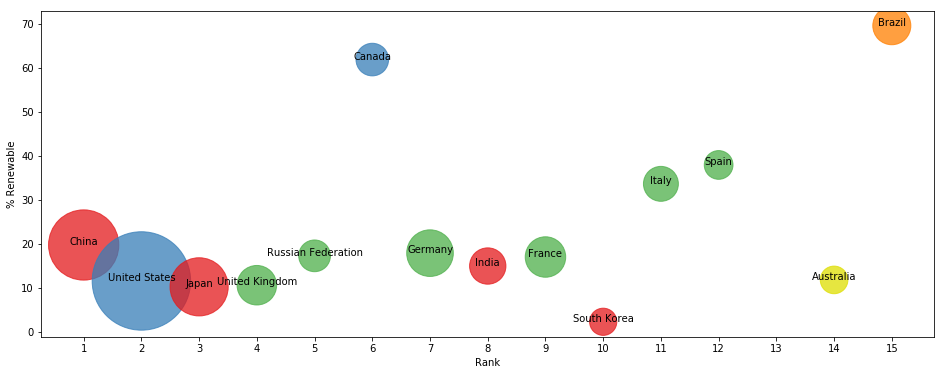

In [18]:
#plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!